## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouse_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_merge_df['Mouse ID'].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_merge_df.loc[mouse_merge_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID']
duplicates.unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_df = mouse_merge_df.loc[mouse_merge_df["Mouse ID"]=="g989"]
# mouse_merge_df.loc[duplicates, :]
duplicates_df
len(duplicates_df)

13

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_mouse_data = mouse_merge_df.drop_duplicates(subset= ['Mouse ID','Timepoint'], keep='first')
clean_mouse_data = mouse_merge_df.loc[mouse_merge_df["Mouse ID"]!="g989"]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data['Mouse ID'].count()

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
mouse_regimens_df = clean_mouse_data.groupby('Drug Regimen')

In [8]:
# mean, median, variance, and standard deviation of the tumor volume.
TV_mean = mouse_regimens_df['Tumor Volume (mm3)'].mean()
TV_median = mouse_regimens_df['Tumor Volume (mm3)'].median()
TV_variance = mouse_regimens_df['Tumor Volume (mm3)'].var()
TV_SD = mouse_regimens_df['Tumor Volume (mm3)'].std()

In [9]:
# Calculate SEM
TV_sample = mouse_regimens_df['Tumor Volume (mm3)'].sample(20)
TV_SEM = sem(TV_sample)

In [10]:
# Assemble the resulting series into a single summary dataframe.
TV_stats_df = pd.DataFrame({
    "Mean": TV_mean,
    "Median": TV_median,
    "Variance": TV_variance,
    "Standard Deviation": TV_SD,
    "SEM": TV_SEM
})

print(TV_stats_df)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.606147
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.606147
Infubinol     52.884795  51.820584  43.128684            6.567243  0.606147
Ketapril      55.235638  53.698743  68.553577            8.279709  0.606147
Naftisol      54.331565  52.509285  66.173479            8.134708  0.606147
Placebo       54.033581  52.288934  61.168083            7.821003  0.606147
Propriva      52.320930  50.446266  43.852013            6.622085  0.606147
Ramicane      40.216745  40.673236  23.486704            4.846308  0.606147
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.606147
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.606147


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_regimens_df.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total number of timepoints for all mice'}>

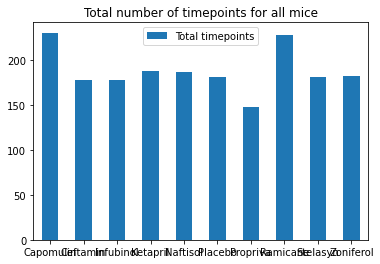

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_sum = mouse_regimens_df['Timepoint'].count()
drug_regimens = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
timepoint_bargraph_df = pd.DataFrame({"Total timepoints": timepoint_sum}, index = drug_regimens)
timepoint_bargraph_df.plot.bar(title='Total number of timepoints for all mice', rot=0)


Text(0, 0.5, 'Number of Timepoints')

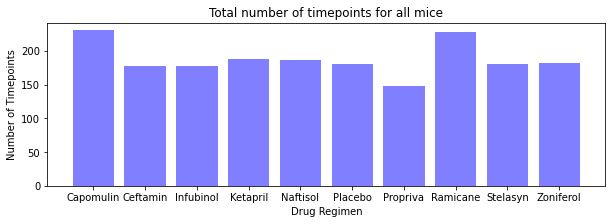

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(10,3))
plt.bar(drug_regimens, timepoint_sum, color='b', alpha=0.5, align="center")
plt.title("Total number of timepoints for all mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_mouse_data['Sex'].value_counts()
print(gender)

Male      958
Female    922
Name: Sex, dtype: int64


<AxesSubplot:title={'center':'Division of Lab Mice by Sex'}, ylabel='Sex'>

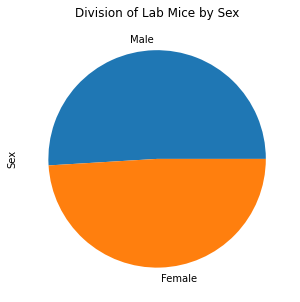

In [15]:
gender.plot.pie(y='Sex', figsize=(5,5), title = 'Division of Lab Mice by Sex')

Text(0.5, 1.0, 'Division of Lab Mice by Sex')

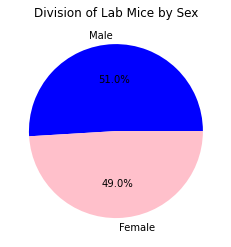

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
sizes = [958, 922]
colors = ["blue", "pink"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Division of Lab Mice by Sex")

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Capomulin = mouse_regimens_df.get_group('Capomulin')
# Ramicane = mouse_regimens_df.get_group('Ramicane')
# Infubinol = mouse_regimens_df.get_group('Infubinol')
# Ceftamin = mouse_regimens_df.get_group('Ceftamin')

clean_mouse_regimens = clean_mouse_data.groupby('Mouse ID')['Timepoint'].max()
clean_mouse_regimens = clean_mouse_regimens.reset_index()

In [19]:
clean_mouse_merge = clean_mouse_regimens.merge(clean_mouse_data, on=['Mouse ID', 'Timepoint'], how='left')
clean_mouse_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [ ]:
keep_cols = ['Mouse ID', 'Timepoint']

In [20]:
clean_mouse_merge.shape

(248, 8)

In [ ]:
# Start by getting the last (greatest) timepoint for each mouse
# final_volume_group = clean_mouse_merge.groupby('Mouse ID')
# final_timepoint = clean_mouse_merge['Timepoint'].max()
# time_group = mouse_regimens_2.groupby('Timepoint')
# final_volume_group = time_group.get_group(45)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# mouse_regimens_3 = pd.merge(final_volume_group[keep_cols], clean_mouse_merge, on=["Mouse ID","Timepoint"], how = 'left')
# mouse_regimens_3.head()

In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in treatments:
    quartiles = clean_mouse_merge[clean_mouse_merge['Drug Regimen']==drugs]['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    #print(quartiles)
    #print(f'The lower quartile for tumor volumes on the {drugs} regimen is: {lowerq}')
    #print(f'The upper quartile of tumor volumes on the {drugs} regimen is: {upperq}')
    #print(f'The interquartile range of tumor volumes on the {drugs} regimen is: {iqr}')
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice = clean_mouse_merge.loc[clean_mouse_merge['Drug Regimen']==drugs,'Tumor Volume (mm3)']
   
    # add subset
    tumor_vol_data.append(mice)
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_tv = clean_mouse_merge[(clean_mouse_merge['Tumor Volume (mm3)'] < lower_bound) | (clean_mouse_merge['Tumor Volume (mm3)'] > upper_bound)]
    
    

In [25]:
len(outlier_tv)




2

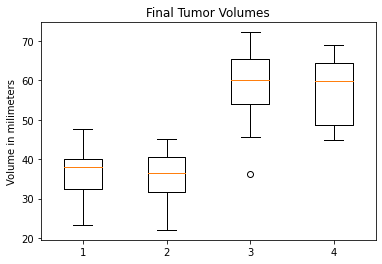

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_volume = tumor_vol_data

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Volume in milimeters')
ax1.boxplot(tumor_volume)
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume in Milimeters')

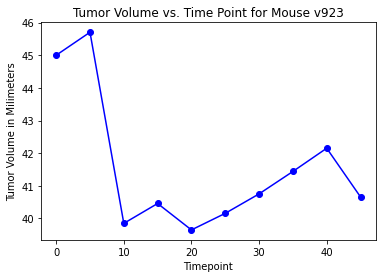

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = clean_mouse_data.loc[clean_mouse_data['Mouse ID']=='v923']
Capomulin_x_axis = mouse['Timepoint']
Capomulin_y_var = mouse['Tumor Volume (mm3)']
Capomulin_line, = plt.plot(Capomulin_x_axis, Capomulin_y_var, marker = 'o', color = 'blue', label = "Tumor Volume")
plt.title("Tumor Volume vs. Time Point for Mouse v923")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume in Milimeters")


In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin = clean_mouse_data.loc[clean_mouse_data['Drug Regimen']=='Capomulin']
Capomulin.shape

(230, 8)

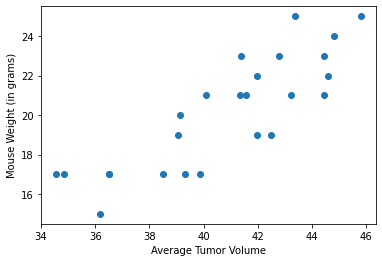

In [35]:
average_tv = Capomulin.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
mouse_weight = Capomulin.groupby('Mouse ID').mean()['Weight (g)']
plt.scatter(average_tv, mouse_weight)
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight (in grams)')
plt.show()

## Correlation and Regression

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(average_tv, mouse_weight)
print(correlation)

(0.8419363424694717, 1.322572243471279e-07)


The r-squared is: 0.7088568047708717


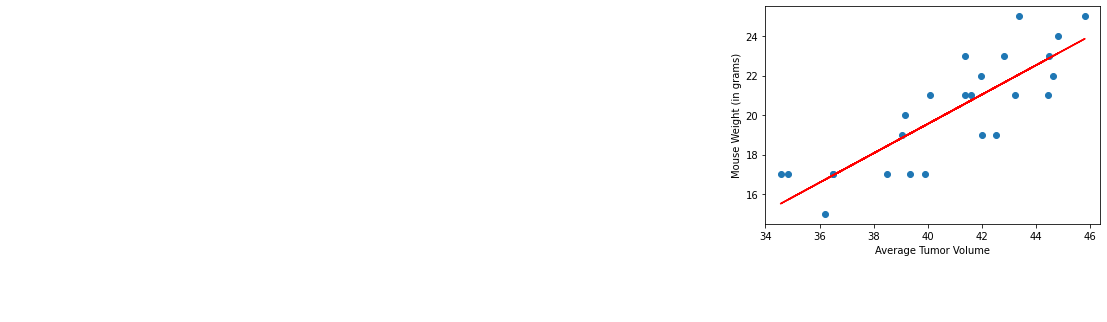

In [37]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(average_tv, mouse_weight)
regress_values = average_tv*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
plt.scatter(average_tv, mouse_weight)
plt.plot(average_tv, regress_values, "r-")
plt.annotate(line_eq, (6, 10), fontsize = 10, color = "red")
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight (in grams)')
print(f'The r-squared is: {rvalue**2}')
plt.show()
